# A MULTI-OBJECTIVE APPROACH FOR PRACTICAL PORTFOLIO OPTIMIZATION PROBLEM

## Install requirements

In [4]:
from IPython.display import clear_output

In [6]:
!pip install yfinance
!pip install fix_yahoo_finance
!pip install pymoo
clear_output()

In [7]:
# Load Packages
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

## Pull the stock price data

In [9]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '2020-04-30' #'2022-04-30'
end_date = '2025-04-30'   #'2025-04-30'

# Set the ticker
# ticker = ['AMZN', 'SPY', 'TSLA', 'FB']


ticker = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'TSLA', 'AVGO', 'GOOG', 'BRK-B',
          'JPM', 'LLY', 'V', 'XOM', 'UNH', 'MA', 'COST', 'WMT', 'HD', 'PG',
          'NFLX', 'JNJ', 'ABBV', 'CRM', 'BAC', 'ORCL', 'MRK', 'CVX', 'WFC', 'KO',
          'CSCO', 'ACN', 'NOW', 'TMO', 'MCD', 'IBM', 'AMD', 'DIS', 'PEP', 'LIN',
          'ABT', 'ISRG', 'PM', 'GE', 'ADBE', 'GS', 'QCOM', 'TXN', 'CAT', 'INTU']

# Get the data
data = yf.download(ticker, start_date, end_date, auto_adjust=False) # adding auto_adjust=False to get Adj Close
data

[*********************100%***********************]  50 of 50 completed


Price        Adj Close                                                  \
Ticker            AAPL        ABBV         ABT         ACN        ADBE   
Date                                                                     
2020-04-30   71.205711   66.976059   84.281433  171.929504  353.640015   
2020-05-01   70.059364   67.497536   82.231377  167.194672  343.839996   
2020-05-04   71.050606   66.699043   82.213051  166.674789  349.109985   
2020-05-05   72.116982   69.558968   85.141716  168.615128  356.130005   
2020-05-06   72.861061   69.599701   83.357094  167.463943  362.519989   
...                ...         ...         ...         ...         ...   
2025-04-23  204.332062  177.050003  129.839996  288.160004  351.959991   
2025-04-24  208.097107  180.369995  129.380005  291.410004  360.910004   
2025-04-25  209.005920  186.059998  128.850006  293.390015  367.720001   
2025-04-28  209.864792  192.339996  129.529999  293.250000  368.619995   
2025-04-29  210.933395  193.509995  130.500000  298.470001  370.980011   

Price                                                                 ...  \
Ticker            AMD        AMZN        AVGO        BAC       BRK-B  ...   
Date                                                                  ...   
2020-04-30  52.389999  123.699997   23.907370  21.239515  187.360001  ...   
2020-05-01  49.880001  114.302002   22.858191  20.382868  182.669998  ...   
2020-05-04  52.560001  115.799500   23.083525  20.250395  177.949997  ...   
2020-05-05  52.189999  115.889999   23.313246  20.011946  176.029999  ...   
2020-05-06  52.160000  117.563004   23.252514  19.738176  172.380005  ...   
...               ...         ...         ...        ...         ...  ...   
2025-04-23  90.389999  180.600006  176.910004  38.750000  526.809998  ...   
2025-04-24  94.470001  186.539993  188.149994  39.580002  531.640015  ...   
2025-04-25  96.650002  188.990005  192.309998  39.689999  530.960022  ...   
2025-04-28  96.389999  187.699997  192.470001  39.779999  530.940002  ...   
2025-04-29  96.059998  187.389999  191.169998  39.990002  534.570007  ...   

Price        Volume                                                   \
Ticker           PM      QCOM      TMO       TSLA       TXN      UNH   
Date                                                                   
2020-04-30  9192200  17113500  2215000  427078500   5781000  7631700   
2020-05-01  4782300   9742100  1603100  487977000   5839800  3526100   
2020-05-04  4589800   7202400  1189000  288556500   4987000  2894200   
2020-05-05  3696400   7540800  1139900  254875500   5242400  2501300   
2020-05-06  7199100   8179700  1215600  166848000   3701300  2579200   
...             ...       ...      ...        ...       ...      ...   
2025-04-23  9084500   9073500  3492200  150381900  14125000  8345700   
2025-04-24  8564900   8810600  3662400   94464200  18950400  7629100   
2025-04-25  7755700   5145600  2698300  167560700   8383300  9263800   
2025-04-28  6153300   5743500  2531600  151731800   5170500  6614300   
2025-04-29  5346500   6692000  2437300  108906600   6566500  9909100   

Price                                               
Ticker             V       WFC       WMT       XOM  
Date                                                
2020-04-30  11331600  29506100  40497900  37076300  
2020-05-01  10109600  35197600  31143900  35399300  
2020-05-04   9386200  34343900  17807700  27465600  
2020-05-05  13513000  56753400  19337400  29276200  
2020-05-06   8540500  57732900  17309100  22659000  
...              ...       ...       ...       ...  
2025-04-23   8906000  20678800  18046900  14235700  
2025-04-24   8055200  18420900  13444500   9849600  
2025-04-25   4452800  17775900  15317200  11245800  
2025-04-28   5422900  16694100  12950000  13890900  
2025-04-29   5519500  24563600  12679000   9483100  

[1256 rows x 300 columns]

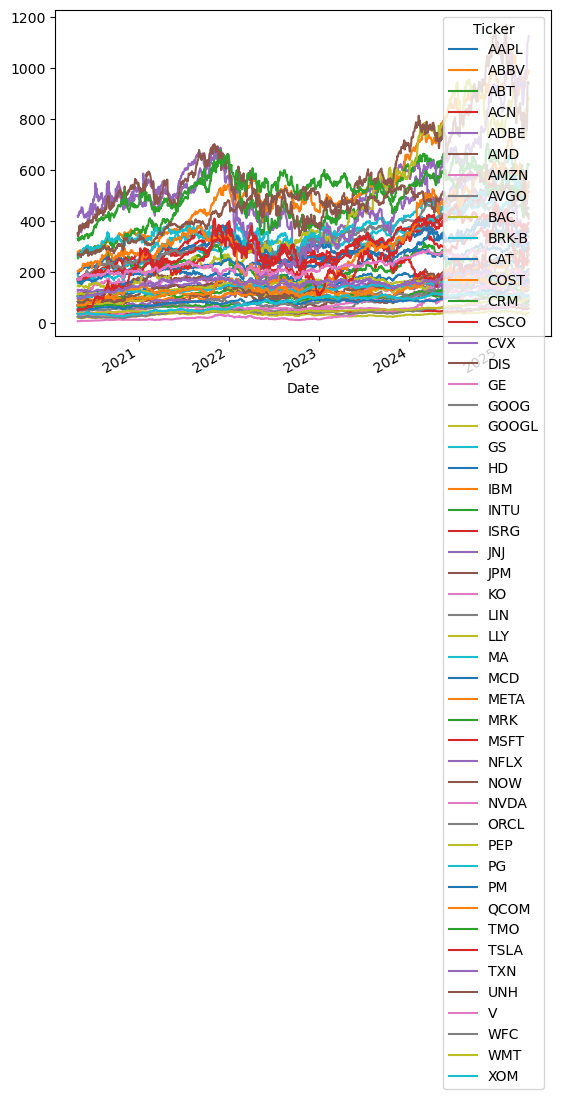

In [10]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

In [11]:
# Closing price
data = data['Adj Close']
data

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMD,AMZN,AVGO,BAC,BRK-B,...,PM,QCOM,TMO,TSLA,TXN,UNH,V,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-30,71.205711,66.976059,84.281433,171.929504,353.640015,52.389999,123.699997,23.907370,21.239515,187.360001,...,57.413334,70.595299,330.662079,52.125332,100.123314,271.762909,172.191315,25.436092,37.561836,36.323387
2020-05-01,70.059364,67.497536,82.231377,167.194672,343.839996,49.880001,114.302002,22.858191,20.382868,182.669998,...,56.397430,67.876282,325.850555,46.754665,95.376656,264.366516,169.156418,24.157717,37.985199,33.720478
2020-05-04,71.050606,66.699043,82.213051,166.674789,349.109985,52.560001,115.799500,23.083525,20.250395,177.949997,...,56.420517,67.912163,322.797668,50.745998,96.063446,267.181976,169.715179,23.947573,38.226238,35.080547
2020-05-05,72.116982,69.558968,85.141716,168.615128,356.130005,52.189999,115.889999,23.313246,20.011946,176.029999,...,55.566246,69.662033,332.282349,51.214001,96.967583,272.292511,171.921539,23.045715,38.544540,35.041470
2020-05-06,72.861061,69.599701,83.357094,167.463943,362.519989,52.160000,117.563004,23.252514,19.738176,172.380005,...,55.027512,70.774773,331.126465,52.172001,97.732605,268.324860,172.249115,22.424040,38.102627,34.384884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-23,204.332062,177.050003,129.839996,288.160004,351.959991,90.389999,180.600006,176.910004,38.750000,526.809998,...,168.110001,140.460007,431.640015,250.740005,150.862915,427.959991,333.815613,67.569305,94.730957,106.390129
2025-04-24,208.097107,180.369995,129.380005,291.410004,360.910004,94.470001,186.539993,188.149994,39.580002,531.640015,...,170.070007,147.210007,426.660004,259.510010,160.758499,424.250000,335.153381,69.180458,95.608833,107.638626
2025-04-25,209.005920,186.059998,128.850006,293.390015,367.720001,96.650002,188.990005,192.309998,39.689999,530.960022,...,170.240005,148.559998,424.239990,284.950012,161.482330,418.640015,334.614288,69.349541,94.860641,107.579178


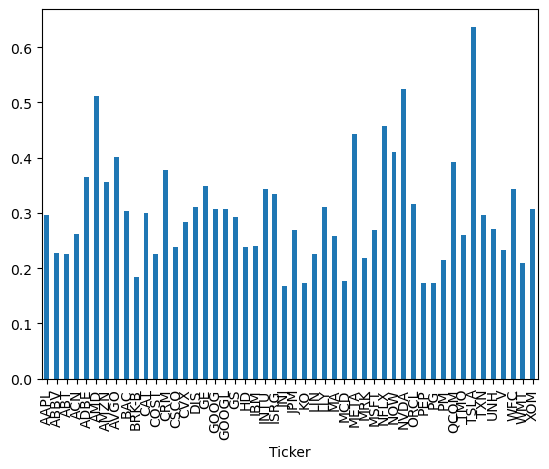

In [12]:
# Volatility of stocks
data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250)).plot(kind='bar')
plt.show()  # Explicitly render the plot

## Process on all dataset


In [14]:
# Log of percentage change
cov_matrix = data.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AMD,AMZN,AVGO,BAC,BRK-B,...,PM,QCOM,TMO,TSLA,TXN,UNH,V,WFC,WMT,XOM
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000352,0.000046,0.000087,0.000159,0.000237,0.000331,0.000251,2.410917e-04,0.000109,0.000092,...,0.000050,0.000272,0.000132,0.000383,0.000201,0.000063,0.000136,0.000106,0.000077,0.000069
ABBV,0.000046,0.000207,0.000071,0.000053,0.000045,0.000030,0.000032,4.084530e-05,0.000058,0.000054,...,0.000061,0.000044,0.000065,0.000027,0.000057,0.000064,0.000060,0.000064,0.000041,0.000065
ABT,0.000087,0.000071,0.000205,0.000101,0.000111,0.000110,0.000091,7.565271e-05,0.000067,0.000063,...,0.000056,0.000103,0.000131,0.000096,0.000087,0.000061,0.000087,0.000061,0.000042,0.000030
ACN,0.000159,0.000053,0.000101,0.000273,0.000198,0.000226,0.000180,1.793058e-04,0.000126,0.000099,...,0.000054,0.000187,0.000129,0.000212,0.000161,0.000077,0.000134,0.000132,0.000060,0.000077
ADBE,0.000237,0.000045,0.000111,0.000198,0.000532,0.000383,0.000301,2.810385e-04,0.000085,0.000075,...,0.000035,0.000283,0.000162,0.000365,0.000205,0.000059,0.000154,0.000087,0.000065,0.000035
AMD,0.000331,0.000030,0.000110,0.000226,0.000383,0.001050,0.000402,4.787946e-04,0.000161,0.000105,...,0.000026,0.000503,0.000205,0.000600,0.000362,0.000071,0.000183,0.000166,0.000075,0.000076
AMZN,0.000251,0.000032,0.000091,0.000180,0.000301,0.000402,0.000506,2.895883e-04,0.000123,0.000086,...,0.000025,0.000291,0.000148,0.000421,0.000209,0.000048,0.000140,0.000122,0.000081,0.000046
AVGO,0.000241,0.000041,0.000076,0.000179,0.000281,0.000479,0.000290,6.449750e-04,0.000140,0.000087,...,0.000030,0.000410,0.000144,0.000455,0.000290,0.000055,0.000142,0.000153,0.000063,0.000076
BAC,0.000109,0.000058,0.000067,0.000126,0.000085,0.000161,0.000123,1.402180e-04,0.000370,0.000151,...,0.000089,0.000166,0.000074,0.000208,0.000150,0.000076,0.000133,0.000351,0.000050,0.000190


In [15]:
# Yearly returns for individual companies
ind_er = data.resample('Y').last().pct_change().mean()
ind_er

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\1202306265.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = data.resample('Y').last().pct_change().mean()


Ticker
AAPL     0.144785
ABBV     0.171995
ABT      0.066874
ACN      0.093992
ADBE     0.015946
AMD      0.181952
AMZN     0.126898
AVGO     0.481199
BAC      0.112059
BRK-B    0.185496
CAT      0.141239
COST     0.259500
CRM      0.145628
CSCO     0.103519
CVX      0.179200
DIS     -0.095671
GE       0.359469
GOOG     0.212281
GOOGL    0.210481
GS       0.208027
HD       0.116342
IBM      0.196065
INTU     0.187091
ISRG     0.172221
JNJ      0.025385
JPM      0.186453
KO       0.086978
LIN      0.135632
LLY      0.418809
MA       0.097768
MCD      0.105221
META     0.427742
MRK      0.063629
MSFT     0.178487
NFLX     0.269656
NOW      0.197391
NVDA     0.933348
ORCL     0.216350
PEP      0.011112
PG       0.059705
PM       0.216570
QCOM     0.046366
TMO      0.006853
TSLA     0.242565
TXN      0.027185
UNH      0.063537
V        0.106301
WFC      0.240724
WMT      0.189941
XOM      0.303240
dtype: float64

In [16]:
# Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.
ann_sd = data.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Ticker
AAPL     0.296558
ABBV     0.227219
ABT      0.226598
ACN      0.261306
ADBE     0.364814
AMD      0.512243
AMZN     0.355506
AVGO     0.401552
BAC      0.303960
BRK-B    0.183600
CAT      0.300475
COST     0.225674
CRM      0.377364
CSCO     0.238365
CVX      0.283749
DIS      0.310526
GE       0.349237
GOOG     0.306756
GOOGL    0.307538
GS       0.291889
HD       0.238120
IBM      0.241103
INTU     0.343772
ISRG     0.333831
JNJ      0.167064
JPM      0.270027
KO       0.172553
LIN      0.225079
LLY      0.310419
MA       0.258774
MCD      0.176318
META     0.442769
MRK      0.218478
MSFT     0.268719
NFLX     0.458095
NOW      0.411206
NVDA     0.525115
ORCL     0.316686
PEP      0.173317
PG       0.173409
PM       0.214101
QCOM     0.391800
TMO      0.259639
TSLA     0.637065
TXN      0.295914
UNH      0.270264
V        0.233027
WFC      0.343966
WMT      0.210101
XOM      0.306719
dtype: float64

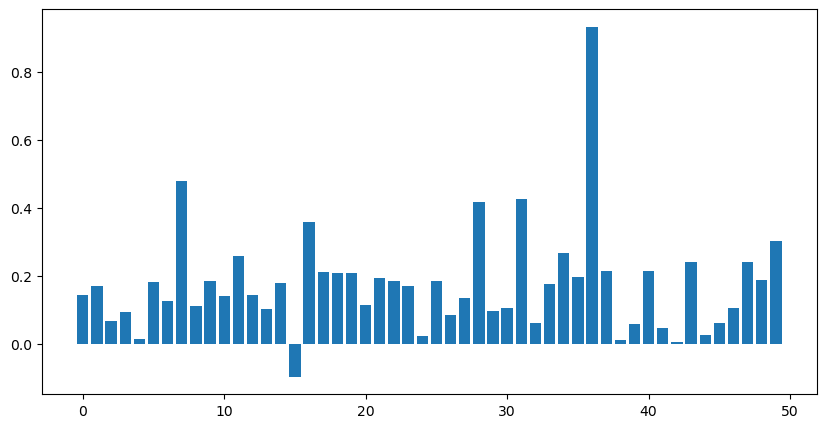

DONE


In [17]:
mu = np.array(ind_er)
cov = np.array(cov_matrix)

corr_matrix = data.pct_change().apply(lambda x: np.log(1+x)).corr()
labels = data.columns

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 5))
k = np.arange(len(mu))
ax.bar(k, mu)
plt.show()


f = plt.figure(figsize=(10, 10))
plt.matshow(corr_matrix, fignum=f.number)
plt.xticks(k, labels, fontsize=12, rotation=90)
plt.yticks(k, labels, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
print("DONE")

## Solve problem with NSGA_II

In [19]:
# import libs
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
import operator

In [20]:
class PortfolioProblem(ElementwiseProblem):

    def __init__(self, mu, cov, returns_df, risk_free_rate=0.02, VaR_confidence = 0.95, hhi_limit=0.15, **kwargs):
        super().__init__(n_var=len(np.array(ticker)), n_obj=2, xl=0.0, xu=1.0, **kwargs)
        self.mu = mu
        self.cov = cov
        self.returns_df = returns_df
        self.risk_free_rate = risk_free_rate
        self.VaR_confidence = VaR_confidence
        self.hhi_limit = hhi_limit        
        self.DAYS_PER_YEAR = 250
        self.z_alpha = norm.ppf(self.VaR_confidence)

    def _evaluate(self, x, out, *args, **kwargs):
        x = np.asarray(x).flatten()
        
        exp_return = x @ self.mu
        volatility_daily = np.sqrt(x @ self.cov @ x)
        volatility_annual = volatility_daily * np.sqrt(self.DAYS_PER_YEAR)
        exp_return_annual = exp_return * self.DAYS_PER_YEAR

        # sharp ratio
        sharpe = (exp_return - self.risk_free_rate) / volatility_annual

        port_daily_ret = self.returns_df @ x #每日報酬
        
        '''
        # --- Calmar ratio ---
        
        # 若沒有回測區間太短會失敗，使用者自行確認 returns_df 的長度
        cum = np.cumprod(1 + port_daily_ret)
        running_max = np.maximum.accumulate(cum)
        running_max[running_max == 0] = 1e-6
        drawdowns = (running_max - cum) / running_max
        max_dd = drawdowns.max() if len(drawdowns) else 0.0
        calmar = np.inf if max_dd == 0 else exp_return_annual / max_dd
        '''
        
        # --- Herfindahl–Hirschman Index (HHI) 作多元化 ---
        hhi = np.sum(np.square(x))          # ∑ w_i²，1 = 全押單一資產
        diversity = 1 - hhi                 # 值愈大愈分散
        
        # --- Value at Risk ---
        var = -np.percentile(port_daily_ret, (1 - self.VaR_confidence) * 100)
        
        
        
        out["F"] = [volatility_annual, -exp_return]
        out["sharpe"] = sharpe
        # out["calmar"] = calmar
        out["diversity"] = diversity
        out["var"] = var

In [21]:
class PortfolioRepair(Repair):

    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

In [22]:
'''

# for crossover 
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.crossover.pntx import PointCrossover, SinglePointCrossover, TwoPointCrossover
from pymoo.operators.crossover.expx import ExponentialCrossover
from pymoo.operators.crossover.ux import UniformCrossover
from pymoo.operators.crossover.hux import HalfUniformCrossover

# for selection
# it seems that we can't set selection here
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.operators.sampling.lhs import LHS

# Adding configure 
configurations = [
    # BinaryRandomSampling
    {
        'name': 'BinaryRandomSampling_SBX',
        'sampling': BinaryRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'BinaryRandomSampling_SinglePtXO',
         'sampling': BinaryRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'BinaryRandomSampling_TwoPtXO',
        'sampling': BinaryRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    
    {
        'name': 'BinaryRandomSampling_UnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'BinaryRandomSampling_HalfUnifXO',
        'sampling': BinaryRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },

    # FloatRandomSampling
    {
        'name': 'FloatRandomSampling_SBX',
        'sampling': FloatRandomSampling(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'FloatRandomSampling_SinglePtXO',
         'sampling': FloatRandomSampling(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'FloatRandomSampling_TwoPtXO',
        'sampling': FloatRandomSampling(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'FloatRandomSampling_ExpXO',
        'sampling': FloatRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'FloatRandomSampling_UnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'FloatRandomSampling_HalfUnifXO',
        'sampling': FloatRandomSampling(),
        'crossover': HalfUniformCrossover(),
    },
    
    # LHS
    {
        'name': 'LHS_SBX',
        'sampling': LHS(),
        'crossover': SBX(),  # Default SBX parameters
    },
     {
        'name': 'LHS_SinglePtXO',
         'sampling': LHS(),
        'crossover': SinglePointCrossover(),  # More aggressive crossover
    },
    {
        'name': 'LHS_TwoPtXO',
        'sampling': LHS(),
        'crossover': TwoPointCrossover(),
    },
    {
        'name': 'LHS_ExpXO',
        'sampling': LHS(),
        'crossover': ExponentialCrossover(),
    },
    {
        'name': 'LHS_UnifXO',
        'sampling': LHS(),
        'crossover': UniformCrossover(),
    },
    {
        'name': 'LHS_HalfUnifXO',
        'sampling': LHS(),
        'crossover': HalfUniformCrossover(),
    },
]
'''

''' we ignore
{
        'name': 'BinaryRandomSamplingn_ExpXO',
        'sampling': BinaryRandomSampling(),
        'crossover': ExponentialCrossover(),
    },
'''

'''
# Store results 
results = {}

'''

'\n# Store results \nresults = {}\n\n'

## Needed function 

In [56]:
from pymoo.indicators.hv import HV
from scipy.stats import norm

def calculate_expected_returns(current_data):
    ind_er = current_data.resample('Y').last().pct_change().mean()
    # print(ind_er)
    return ind_er

def calculate_covariance_matrix(current_data):
    cov_matrix = current_data.pct_change().apply(lambda x: np.log(1+x)).cov()
    # print(cov_matrix)
    return cov_matrix

def calculate_returns_df_matrix(current_data):
    returns_df = current_data.pct_change().dropna()
    return returns_df
    
    
def execute_trades(stock_alloc, final_weight, current_budget, price_day, budget_history, stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')

    print(f'Stock allocation: {stock_alloc}')

    
    if not np.allclose(stock_alloc, np.zeros(len(ticker))):
        current_budget = stock_alloc @ prices_array
    
    
    
    dollar_alloc = current_budget*final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    print(f'Stock allocation (shares): {stock_alloc}')

    budget_history.append(current_budget)
    stock_alloc_history.append(stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {current_budget}')

'''
def calmar_execute_trades(calmar_stock_alloc, calmar_final_weight, calmar_current_budget, price_day, calmar_budget_history, calmar_stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'for calmar trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')

    print(f'Stock allocation: {calmar_stock_alloc}')

    
    if not np.allclose(calmar_stock_alloc, np.zeros(len(ticker))):
        calmar_current_budget = calmar_stock_alloc @ prices_array
    
    
    
    dollar_alloc = calmar_current_budget*calmar_final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    calmar_stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    print(f'Stock allocation (shares): {calmar_stock_alloc}')

    calmar_budget_history.append(calmar_current_budget)
    calmar_stock_alloc_history.append(calmar_stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {calmar_current_budget}')

def diversity_execute_trades(diversity_stock_alloc, diversity_final_weight, diversity_current_budget, price_day, diversity_budget_history, diversity_stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'for diversity trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')

    print(f'Stock allocation: {diversity_stock_alloc}')

    
    if not np.allclose(diversity_stock_alloc, np.zeros(len(ticker))):
        diversity_current_budget = diversity_stock_alloc @ prices_array
    
    
    
    dollar_alloc = diversity_current_budget*diversity_final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    diversity_stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    print(f'Stock allocation (shares): {diversity_stock_alloc}')

    diversity_budget_history.append(diversity_current_budget)
    diversity_stock_alloc_history.append(diversity_stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {diversity_current_budget}')

def max_var_execute_trades(var_stock_alloc, var_final_weight, var_current_budget, price_day, var_budget_history, var_stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'for max_var trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')

    print(f'Stock allocation: {var_stock_alloc}')

    
    if not np.allclose(var_stock_alloc, np.zeros(len(ticker))):
        var_current_budget = var_stock_alloc @ prices_array
    
    
    
    dollar_alloc = var_current_budget*var_final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    var_stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    print(f'Stock allocation (shares): {var_stock_alloc}')

    var_budget_history.append(var_current_budget)
    var_stock_alloc_history.append(var_stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {var_current_budget}')

def min_var_execute_trades(var_stock_alloc, var_final_weight, var_current_budget, price_day, var_budget_history, var_stock_alloc_history):
    # extract trade date
    trade_date = data.index[price_day]
    print(f'for min_var trade data is {trade_date}')

    # extract stock price in trade date
    prices_series = data.loc[[trade_date]]
    prices_array = prices_series.to_numpy().ravel()  # shape (n,)
    print(f'Prices: {prices_array}')

    print(f'Stock allocation: {var_stock_alloc}')

    
    if not np.allclose(var_stock_alloc, np.zeros(len(ticker))):
        var_current_budget = var_stock_alloc @ prices_array
    
    
    
    dollar_alloc = var_current_budget*var_final_weight
    # current_budget = final_weight.T@data[price_date] 

    

    # Element-wise division to get number of shares
    var_stock_alloc[:] = dollar_alloc / prices_array  # modifies caller's array
    print(f'Stock allocation (shares): {var_stock_alloc}')

    var_budget_history.append(var_current_budget)
    var_stock_alloc_history.append(var_stock_alloc.copy())
    #print(f'stock_alloc is {stock_alloc}')
    print(f'current budget is {var_current_budget}')
'''

def calculate_HV(F):
    ref_point = np.array([0.35, 0.35])

    ind = HV(ref_point=ref_point)
    print("HV", ind(F))
    return ind(F)
    

Current day is: 0


C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


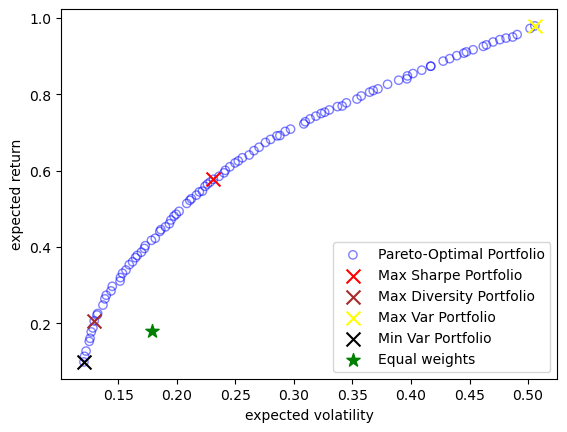

HV 0.057658787831326205
you are doing sharpe
trade data is 2024-04-30 00:00:00
Prices: [169.30749512 156.93881226 103.88739014 295.652771   462.82998657
 158.38000488 175.         128.45658875  36.11787415 396.73001099
 329.22213745 719.1817627  267.37545776  45.6102562  152.72154236
 110.10192108 160.74621582 163.86386108 162.00546265 417.49996948
 326.11108398 159.72970581 621.58728027 370.61999512 140.09561157
 187.39396667  59.97619629 435.48202515 774.47039795 448.56079102
 266.55752563 428.60641479 125.50037384 385.67208862 550.64001465
 693.33001709  86.37361908 112.49365997 170.24714661 159.30563354
  90.86070251 162.59208679 567.07025146 183.27999878 170.16555786
 476.08630371 266.17880249  57.59651566  58.54407883 113.36416626]
Stock allocation: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
Stock allocation (shares): [   0.            0.            0.            0.     

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


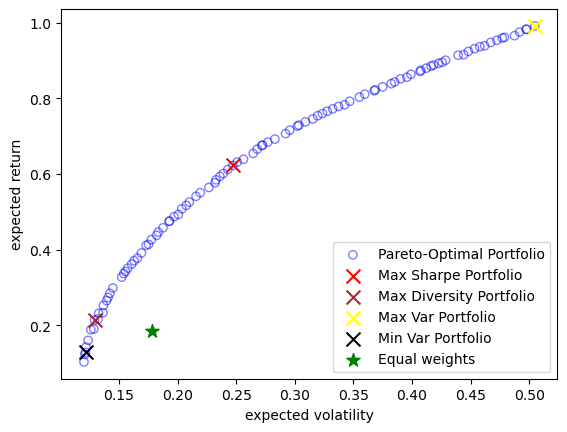

HV 0.056837262768061156
you are doing sharpe
trade data is 2024-05-14 00:00:00
Prices: [186.55751038 155.9256134  101.96590424 301.58728027 475.95001221
 153.16000366 187.07000732 136.33627319  37.56219864 410.23999023
 352.45477295 773.89880371 275.18969727  47.52281952 154.93751526
 104.40357971 158.9382782  171.11949158 169.52946472 448.57446289
 332.23873901 162.44122314 631.32409668 384.19000244 146.67457581
 196.94252014  61.2675705  426.74197388 757.4956665  451.54327393
 264.23400879 470.13491821 124.95649719 412.64627075 613.65997314
 721.61999512  91.3259964  119.53502655 174.07966614 161.80455017
  95.55015564 185.25791931 593.074646   177.55000305 185.68280029
 505.79125977 275.22613525  60.43730927  59.25154495 113.70518494]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


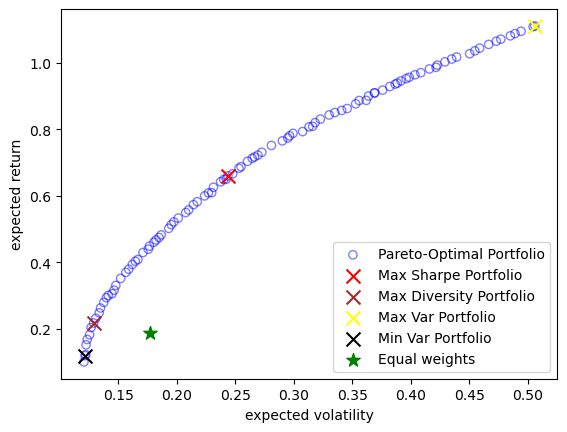

HV 0.05725907506967195
you are doing sharpe
trade data is 2024-05-29 00:00:00
Prices: [189.40420532 149.3639679   98.75037384 288.63754272 477.6000061
 165.13999939 182.02000427 137.3874054   37.78665543 404.08999634
 332.70556641 802.37158203 270.03982544  44.73649597 150.08357239
  99.97373962 162.51438904 176.56369019 175.0630188  447.30255127
 318.00271606 162.14031982 594.42352295 398.3999939  141.08155823
 193.61958313  59.90823364 420.88565063 806.01361084 439.88189697
 243.44947815 472.63574219 122.27594757 425.90460205 654.61999512
 731.11999512 114.78727722 122.37332153 165.64038086 157.79263306
  95.32047272 204.16896057 565.65435791 176.19000244 189.35505676
 477.090271   266.91958618  57.37100983  64.26010895 109.80130768]
Stock allocation: [   0.           48.45187782    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


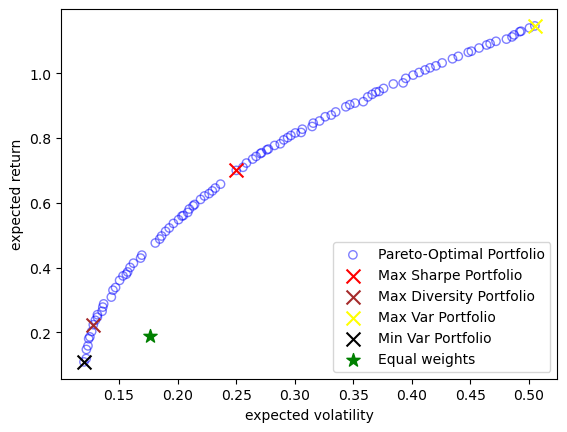

HV 0.055440878411987325
you are doing sharpe
trade data is 2024-06-12 00:00:00
Prices: [212.07818604 160.2678833  102.32862854 280.73800659 459.86999512
 160.24000549 186.88999939 147.74479675  38.69393921 408.76998901
 323.47549438 843.44921875 234.42822266  44.28990936 147.52000427
  99.89446259 159.98130798 178.91690063 177.14709473 441.67211914
 338.12478638 164.03303528 588.40258789 428.1000061  142.02900696
 187.1887207   61.05396271 430.15304565 861.40447998 440.40875244
 250.05114746 506.990448   126.4521637  437.70413208 650.05999756
 721.5        125.16915131 138.82954407 159.8062439  161.23838806
  98.23942566 212.02429199 574.02008057 177.28999329 193.30905151
 485.30883789 268.36907959  55.95504761  65.6359787  107.19228363]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


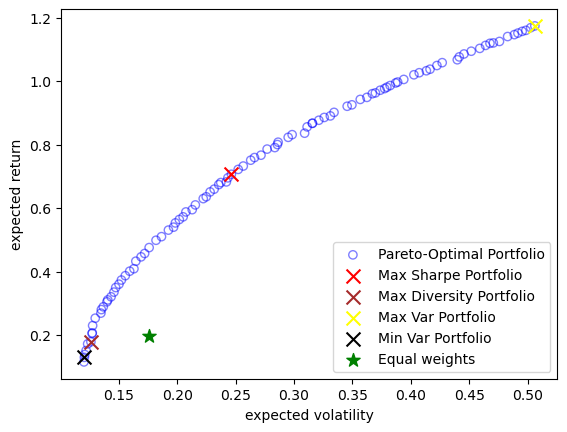

HV 0.05398177522022991
you are doing sharpe
trade data is 2024-06-27 00:00:00
Prices: [213.10339355 163.06622314 102.59332275 297.89297485 546.76000977
 159.47000122 197.8500061  157.24743652  38.53684616 407.95001221
 322.22579956 846.24468994 251.37905884  46.06655502 149.52879333
 101.25215149 159.4349823  186.19075012 184.73956299 438.9750061
 335.52102661 165.82865906 647.24090576 445.10998535 142.40992737
 194.6555481   62.53554916 436.14709473 902.86077881 440.1602478
 253.67692566 518.18548584 126.83740234 449.40441895 684.34002686
 774.13000488 123.95944214 138.63174438 162.17657471 162.64402771
  98.47077179 192.10055542 549.55670166 197.41999817 187.91722107
 480.81433105 264.66601562  56.07223129  67.1900177  111.02851868]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


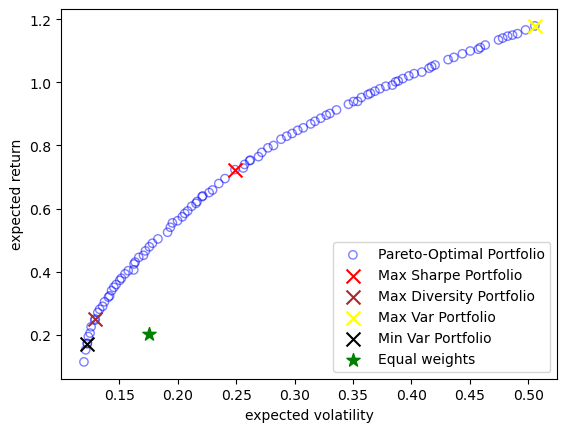

HV 0.05433125491305857
you are doing sharpe
trade data is 2024-07-12 00:00:00
Prices: [229.46684265 164.31098938 102.17176819 306.54150391 559.04998779
 181.61000061 194.49000549 168.54650879  40.83433151 424.44000244
 330.22579956 838.56445312 252.88555908  46.39267349 148.83047485
  96.70150757 158.22221375 186.11103821 184.40080261 472.36373901
 353.48153687 177.45655823 638.69580078 444.16000366 146.39506531
 201.40463257  62.33006287 436.62261963 941.95330811 438.18374634
 249.48123169 497.5501709  124.82472229 450.09909058 647.59997559
 758.48999023 129.2081604  143.57527161 162.29362488 162.63427734
 102.71711731 199.26679993 546.87261963 248.22999573 196.11668396
 505.61416626 263.82208252  55.21289062  68.53619385 109.45343781]
Stock allocation: [   0.           59.54349196    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


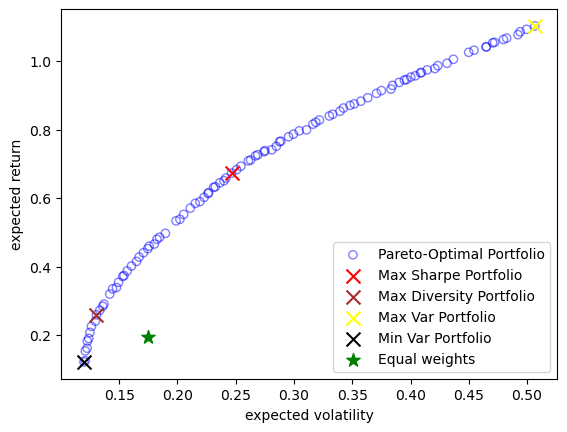

HV 0.052593841646000776
you are doing sharpe
trade data is 2024-07-26 00:00:00
Prices: [216.94543457 180.31069946 103.71907806 324.13677979 542.44000244
 139.99000549 182.5        150.27433777  40.91287613 437.66000366
 346.28237915 814.55255127 261.58822632  46.88225174 150.98272705
  89.53327179 168.96868896 168.0758667  166.39613342 491.21380615
 353.22607422 186.11437988 630.14929199 441.29998779 156.90487671
 208.57868958  65.6080246  447.21374512 799.1505127  436.26220703
 247.61430359 464.46795654 122.38215637 422.03427124 631.36999512
 827.60998535 113.03214264 137.86280823 168.50717163 166.06742859
 109.90102386 177.23652649 605.79144287 219.80000305 196.23327637
 563.13116455 257.58743286  58.97251511  69.0707016  113.37663269]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


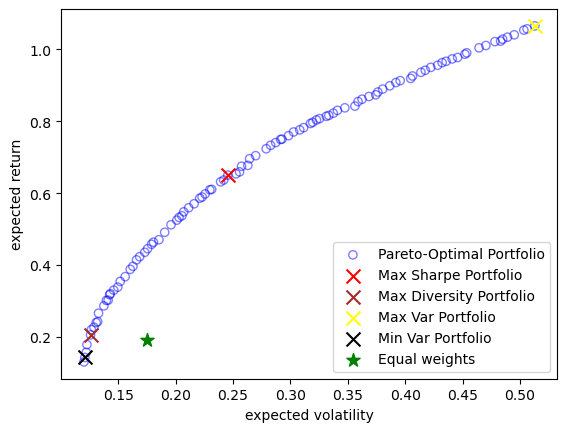

HV 0.05048994841116111
you are doing sharpe
trade data is 2024-08-09 00:00:00
Prices: [215.23344421 184.95576477 107.13893127 311.67300415 536.29998779
 134.27000427 166.94000244 146.9344635   37.58446884 431.67001343
 334.20874023 851.74346924 251.45170593  44.52246857 138.69099426
  85.8296814  166.30198669 164.7976532  163.07817078 482.58117676
 342.54611206 187.44845581 627.00537109 463.42999268 156.88534546
 202.24978638  67.20296478 442.88412476 885.61871338 454.78079224
 263.24743652 516.40020752 111.91822052 402.9307251  633.94000244
 811.08001709 104.72418976 130.97018433 168.15600586 167.47169495
 112.47016144 161.90982056 594.85577393 200.         187.94764709
 552.2979126  258.40240479  51.91520309  67.25930786 114.84541321]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


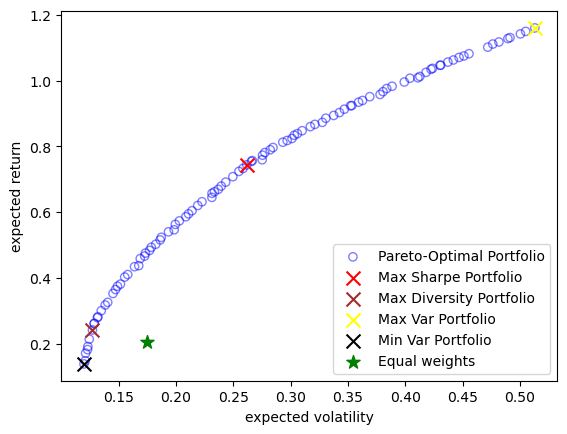

HV 0.048541546805857094
you are doing sharpe
trade data is 2024-08-23 00:00:00
Prices: [226.04542542 192.3762207  111.06142426 328.88348389 558.29998779
 154.97999573 177.03999329 164.87263489  39.04739761 453.38000488
 344.23718262 875.93292236 262.87271118  49.68265915 142.78712463
  90.16049194 170.37171936 166.83033752 165.02111816 501.44107056
 369.02502441 192.00128174 616.70782471 486.54998779 160.31373596
 214.54397583  68.28909302 461.43093872 947.5859375  464.39852905
 284.48132324 526.60308838 113.92111969 414.36431885 686.72998047
 828.27001953 129.33811951 138.04133606 171.55053711 166.12634277
 116.48384094 170.78886414 604.77368164 220.32000732 205.22581482
 577.75012207 266.04229736  55.79211807  75.144104   113.30558014]
Stock allocation: [   0.           14.73720406    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.           16.69778584    0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


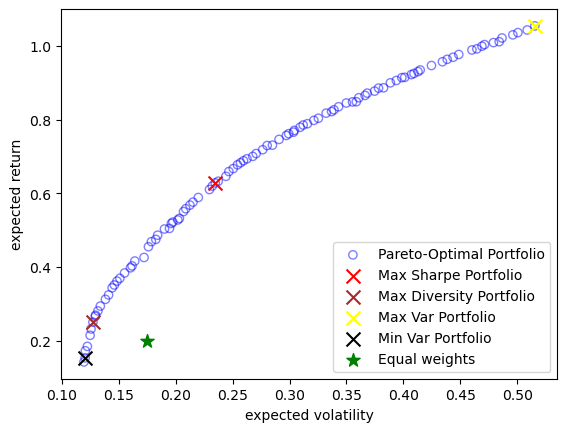

HV 0.047903477589517615
you are doing sharpe
trade data is 2024-09-09 00:00:00
Prices: [220.13619995 191.27577209 114.74736786 337.31109619 569.88000488
 138.1499939  175.3999939  139.56100464  39.00550461 459.60998535
 330.03927612 893.14849854 244.71061707  47.68516541 135.70677185
  87.95027924 164.5308075  149.20054626 148.36888123 483.76275635
 361.31234741 199.27598572 623.81164551 479.39001465 163.9712677
 213.06985474  70.30478668 460.14480591 903.35656738 484.9581604
 287.88604736 503.45452881 112.758461   403.35873413 675.41998291
 855.58001709 106.44377899 138.73554993 175.13710022 172.89237976
 123.56108856 159.07563782 619.04193115 216.27000427 196.70895386
 587.22918701 284.11727905  53.71590424  76.77207947 112.02953339]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


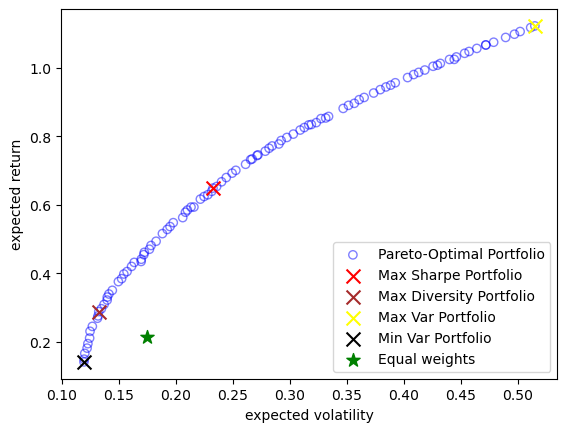

HV 0.04799618357384368
you are doing sharpe
trade data is 2024-09-23 00:00:00
Prices: [225.67671204 188.75361633 113.15077209 334.74526978 527.86999512
 156.75       193.88000488 171.95753479  39.40079498 454.98001099
 366.72460938 913.6618042  263.49484253  51.10243607 142.70973206
  92.55986023 187.73526001 162.69985962 161.47874451 492.51574707
 387.44796753 215.89128113 638.71563721 489.07000732 160.63494873
 207.79249573  70.66854858 474.33428955 913.55102539 494.96420288
 295.56524658 563.45379639 113.72924805 430.98703003 705.36999512
 925.54998779 116.24130249 164.58049011 169.16127014 170.64360046
 117.39515686 164.2109375  609.38122559 250.         199.32952881
 568.78826904 287.121521    54.22758102  79.7401123  114.31863403]
Stock allocation: [   0.           89.15780149    0.            0.            0.
    0.            0.            0.            0.           13.28582892
    0.           39.89481942    0.            0.            0.
    0.            0.            0.    

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


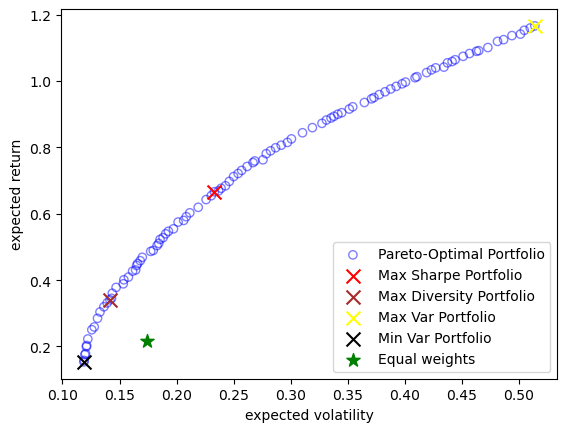

HV 0.04544165079009977
you are doing sharpe
trade data is 2024-10-07 00:00:00
Prices: [220.91348267 188.53939819 111.72173309 352.10375977 487.29998779
 170.97000122 180.80000305 174.08537292  39.48973846 453.5
 393.48022461 870.33392334 283.79977417  51.80870438 146.17253113
  91.98242188 185.3127594  164.0168457  162.6061554  489.75317383
 403.3626709  222.37290955 599.37609863 471.23001099 157.00338745
 208.56156921  67.98880005 460.30377197 893.53985596 489.14971924
 297.33435059 583.78930664 106.80496979 407.15652466 701.91998291
 905.94000244 127.69945526 168.56732178 164.34521484 164.11322021
 116.57492828 165.18061829 597.8994751  240.83000183 196.80673218
 578.85650635 272.35910034  56.24475098  78.51914978 122.12106323]
Stock allocation: [   0.          394.79766595    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.          338.65168548    0.            0.     

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


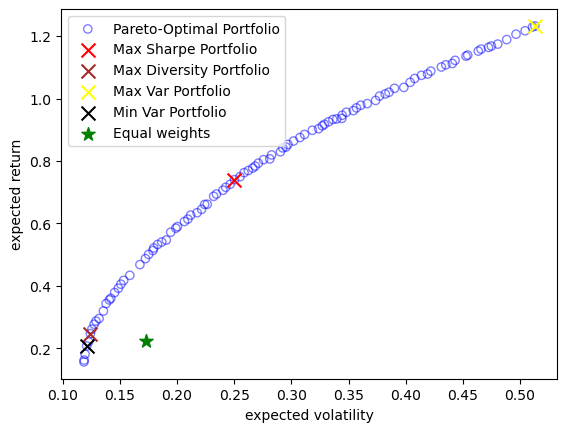

HV 0.04470328723082449
you are doing sharpe
trade data is 2024-10-21 00:00:00
Prices: [235.6516571  183.10514832 115.84266663 372.59112549 497.70999146
 157.8999939  189.07000732 178.96748352  41.26855087 464.16000366
 387.18945312 883.46484375 290.50158691  55.83421707 145.94039917
  96.19376373 193.55395508 165.42366028 163.69366455 512.70507812
 401.72174072 226.90614319 611.8414917  518.85998535 160.25112915
 220.49606323  68.42228699 480.29623413 901.22802734 513.43774414
 311.21026611 574.18554688 104.59194946 416.34274292 772.07000732
 918.34002686 143.68688965 172.71353149 172.01156616 167.46856689
 116.62393951 167.22879028 594.42504883 218.8500061  191.42869568
 566.8638916  285.35083008  62.99490738  80.21659088 116.96814728]
Stock allocation: [   0.          600.60994544    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


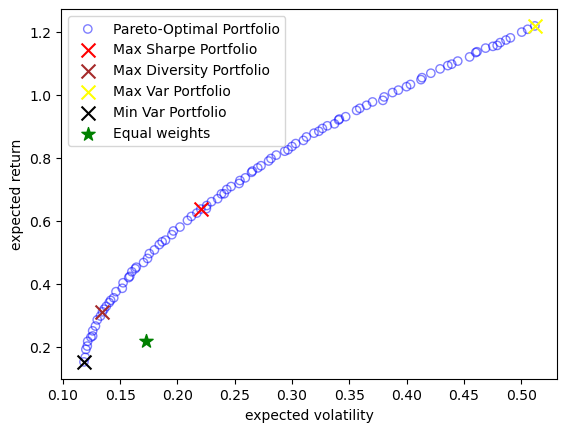

HV 0.0458370618818944
you are doing sharpe
trade data is 2024-11-04 00:00:00
Prices: [221.23233032 196.77867126 116.49620056 340.75494385 481.3500061
 140.71000671 195.77999878 167.59248352  40.84361649 442.29000854
 373.34707642 883.94030762 297.20339966  55.08436584 148.92922974
  95.36742401 171.16217041 170.29255676 168.85179138 506.43740845
 391.01641846 202.00767517 616.90423584 507.42001343 155.73382568
 217.31219482  64.14651489 455.41497803 801.77905273 504.03649902
 289.42782593 559.73010254 100.1954422  406.08279419 755.51000977
 954.59002686 136.02812195 168.56863403 163.49012756 163.06306458
 127.77066803 163.43914795 554.58831787 242.83999634 200.45483398
 553.27435303 290.32470703  62.68003464  81.84454346 115.53623962]
Stock allocation: [   0.           27.63183168    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.          171.11521825    0.            0.

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


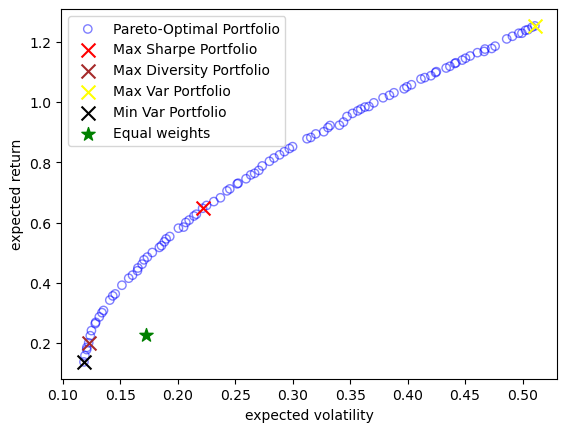

HV 0.04928161809052703
you are doing sharpe
trade data is 2024-11-18 00:00:00
Prices: [ 227.47128296  163.21821594  116.20904541  349.56365967  499.51000977
  138.92999268  201.69999695  164.72883606   46.17018509  472.20001221
  381.22015381  917.29992676  321.37774658   56.54460144  157.08312988
  113.03911591  176.90213013  176.3986969   174.89788818  582.20446777
  405.71524048  205.34635925  676.50079346  531.64001465  152.31878662
  242.27868652   60.94460678  445.72677612  724.46386719  520.03747559
  287.69827271  553.46081543   94.97272491  413.34033203  847.04998779
 1005.34002686  140.12744141  184.6114502   155.61735535  168.66378784
  129.13337708  162.7663269   500.49438477  338.73999023  203.91943359
  584.89746094  311.118927     73.3237381    83.46257782  118.15517426]
Stock allocation: [   0.          462.48237103    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


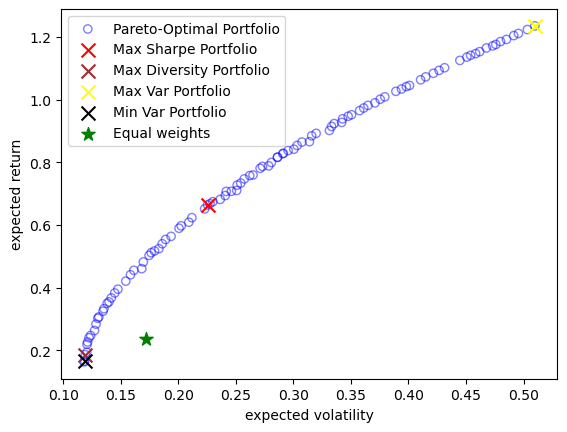

HV 0.04346028293521312
you are doing sharpe
trade data is 2024-12-03 00:00:00
Prices: [ 242.06607056  178.15795898  115.14953613  349.31594849  516.26000977
  141.97999573  213.44000244  167.19474792   46.26900864  470.19000244
  395.89544678  979.78942871  330.53292847   58.68561554  158.21661377
  115.9362793   180.09098816  172.62727356  170.94696045  599.10925293
  426.64251709  225.98066711  633.85638428  541.71002197  151.15010071
  242.07104492   63.0546875   456.59689331  810.26983643  524.5736084
  292.80938721  612.6104126   100.17576599  429.54855347  902.16998291
 1057.31994629  140.23744202  181.7885437   158.92961121  173.27671814
  127.14323425  160.86656189  533.57177734  351.42001343  194.1260376
  600.35180664  311.96609497   73.37322998   92.82333374  115.56245422]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


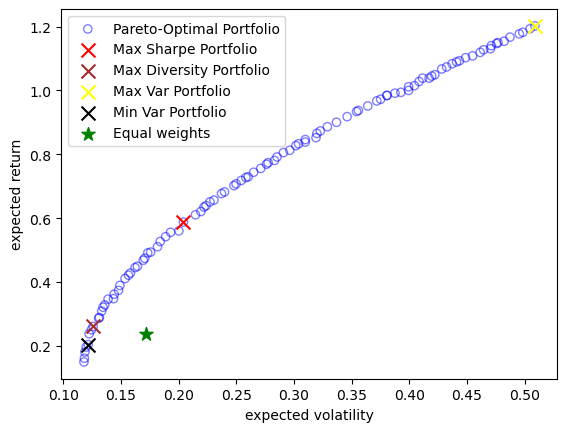

HV 0.046414785580227894
you are doing sharpe
trade data is 2024-12-17 00:00:00
Prices: [ 252.86999512  172.15066528  112.17895508  354.03237915  455.23001099
  125.01999664  231.1499939   238.86526489   44.76748657  455.66000366
  372.63314819  979.71960449  350.02005005   57.73843765  144.72245789
  113.01999664  165.22293091  196.89567566  195.19519043  571.84442139
  405.89416504  225.95106506  675.46435547  545.15997314  145.24734497
  235.68357849   62.93556595  428.76974487  775.69042969  529.38885498
  294.38031006  618.8894043    99.20298004  452.7194519   919.13000488
 1114.7199707   130.37800598  168.68792725  154.77159119  168.24891663
  123.56491852  157.07305908  528.39318848  479.85998535  185.15939331
  483.45385742  317.23843384   70.07765961   94.92916107  106.0754776 ]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.          

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


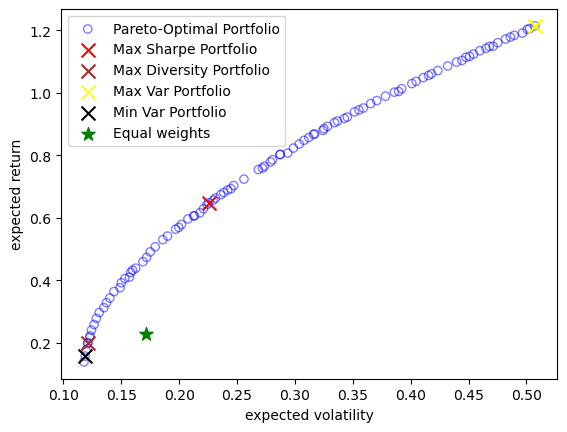

HV 0.049211937996152366
you are doing sharpe
trade data is 2025-01-02 00:00:00
Prices: [ 243.26319885  176.13589478  112.32748413  345.62997437  441.
  120.62999725  220.22000122  231.28015137   44.01225281  451.1000061
  356.7381897   907.62329102  330.14126587   58.31069183  143.35449219
  110.81999969  168.27690125  190.41307068  189.21208191  572.13293457
  386.01034546  217.04013062  620.67138672  524.0300293   142.87632751
  237.30516052   61.38699341  412.79302979  775.14245605  520.80517578
  290.83084106  598.70733643   98.32060242  416.97686768  886.72998047
 1054.33996582  138.29727173  165.03007507  148.89356995  163.95205688
  120.04039764  152.81600952  522.128479    379.27999878  184.0078125
  502.36306763  313.35147095   69.46408081   89.53704071  105.38800812]
Stock allocation: [   0.           37.92737152    0.            0.            0.
    0.            0.          333.45139453    0.            0.
    0.            0.            0.            0.            0.
    0

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


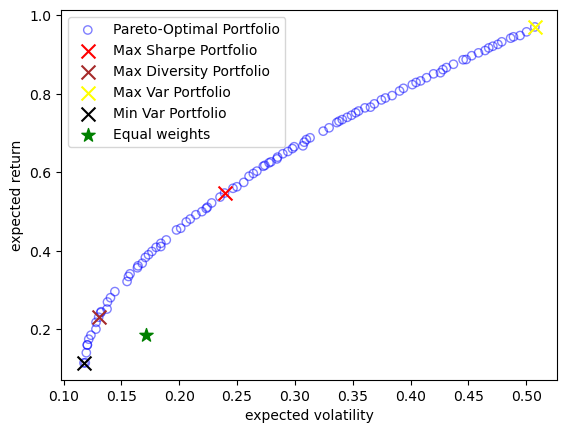

HV 0.05478083255052615
you are doing sharpe
trade data is 2025-01-17 00:00:00
Prices: [ 229.42655945  169.98904419  112.95676422  350.85021973  429.98999023
  121.45999908  225.94000244  236.72369385   46.23820496  467.95001221
  382.76699829  940.92303467  324.05084229   59.83054352  157.77690125
  107.01999664  182.51043701  197.32519531  195.77452087  622.85150146
  406.7984314   221.82617188  603.07666016  592.64001465  145.86242676
  257.57348633   62.25061798  434.55044556  722.98944092  523.86907959
  279.33718872  612.2253418    97.08130646  427.38684082  858.09997559
 1071.47998047  137.69734192  160.45361328  146.95074463  159.16131592
  120.52610779  163.67744446  559.17712402  426.5         189.39173889
  507.59072876  318.55404663   76.28282166   91.46707153  110.30827332]
Stock allocation: [   0.           11.81037044    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            4.19563912    0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


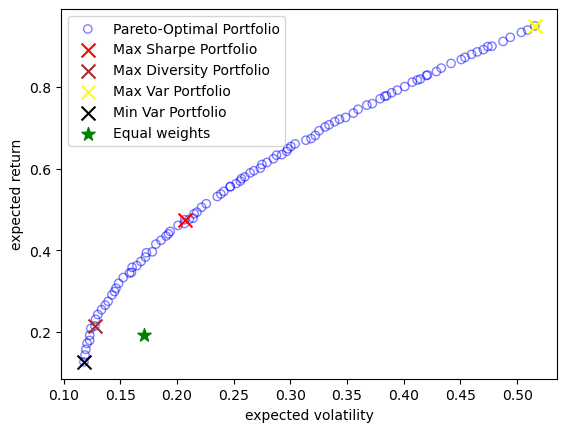

HV 0.051850403619325386
you are doing sharpe
trade data is 2025-02-03 00:00:00
Prices: [ 227.46130371  188.39891052  127.85773468  383.30923462  438.6000061
  114.26999664  237.41999817  217.07313538   45.92021179  464.60998535
  359.81750488 1003.41253662  338.70779419   60.6351738   145.92433167
  114.          203.73094177  202.40939331  200.99850464  629.24975586
  406.18234253  257.29232788  599.71252441  578.54998779  150.66398621
  265.17663574   62.88592911  452.69989014  807.3807373   563.0569458
  288.38491821  696.84008789   98.9352951   409.34622192  978.94000244
 1020.94000244  116.64927673  167.996521    148.95304871  167.71456909
  129.24911499  169.32699585  593.24829102  383.67999268  179.40937805
  545.847229    344.66668701   77.33185577   99.02797699  105.17194366]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


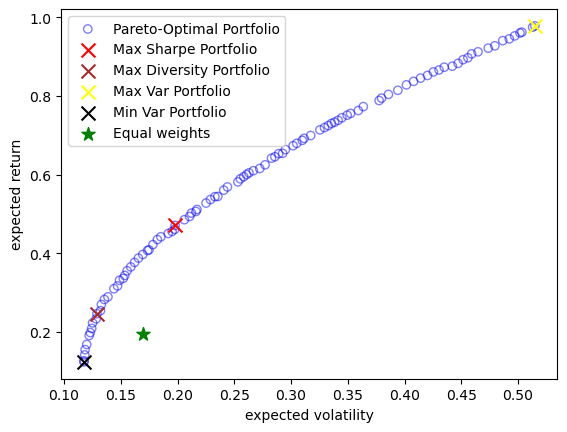

HV 0.052605641207057664
you are doing sharpe
trade data is 2025-02-18 00:00:00
Prices: [ 244.14984131  194.45295715  129.57975769  385.64764404  464.10998535
  114.27999878  226.6499939   227.84056091   46.23820496  482.82000732
  352.30368042 1054.65588379  328.44390869   64.16162872  154.2808075
  109.55999756  209.68986511  185.58856201  183.55859375  668.87329102
  400.76669312  261.33099365  578.92883301  600.89001465  154.99000549
  278.23620605   68.54418182  464.28125     855.4465332   567.70953369
  303.08007812  715.73321533   82.57661438  408.07110596 1035.84997559
  997.47998047  139.38717651  179.15643311  142.83711243  164.40519714
  147.49803162  172.70875549  522.64801025  354.10998535  184.88269043
  498.59918213  356.1385498    80.33924103  103.24616241  109.13484955]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


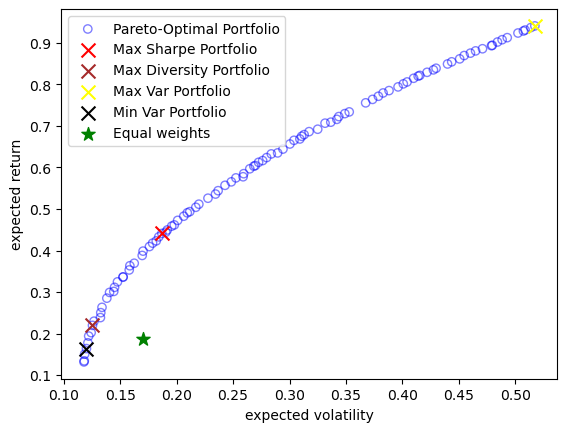

HV 0.05067115929193559
you are doing sharpe
trade data is 2025-03-04 00:00:00
Prices: [ 235.62101746  205.8575592   136.94564819  344.07382202  446.02999878
  100.75        203.80000305  186.91439819   42.4024086   495.85998535
  325.18426514 1035.52075195  286.88922119   62.84045029  150.17086792
  109.01000214  198.40086365  172.41357422  170.72337341  581.14001465
  379.27310181  251.53616333  597.02722168  557.96002197  165.41999817
  248.71801758   69.67582703  459.81616211  909.1963501   554.19104004
  305.76998901  639.43109131   91.76721191  387.89785767  972.58001709
  906.09002686  115.97933197  156.90635681  152.83868408  172.10719299
  152.60296631  153.63162231  516.13354492  272.04000854  193.19178772
  472.59030151  351.64599609   72.90005493   94.48147583  106.55857849]
Stock allocation: [   0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.           

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


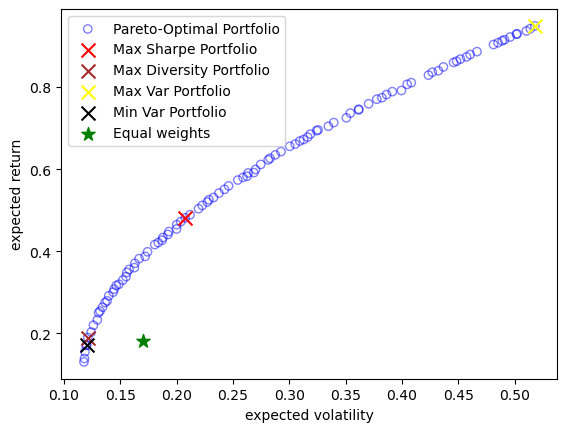

HV 0.05104881864385241
you are doing sharpe
trade data is 2025-03-18 00:00:00
Prices: [212.41145325 211.89179993 125.71765137 322.47094727 391.36999512
 103.51000214 192.82000732 188.10081482  41.65000153 523.14001465
 335.0965271  896.88140869 278.29275513  59.90008163 158.87484741
  99.34999847 200.78999329 162.66999817 160.66999817 551.7800293
 349.57000732 245.3175354  597.9855957  483.95001221 164.25
 233.53155518  69.37999725 460.70999146 820.82751465 529.35040283
 303.6000061  582.35998535  94.72000122 382.81719971 929.97998047
 830.         115.43000031 148.91505432 148.99000549 166.6710968
 152.493927   156.28999329 521.5        225.30999756 177.93197632
 503.79998779 334.2149353   70.72200775  85.14972687 112.60290527]
Stock allocation: [   0.          667.25596231    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.           47.76188102    0.            0.      

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


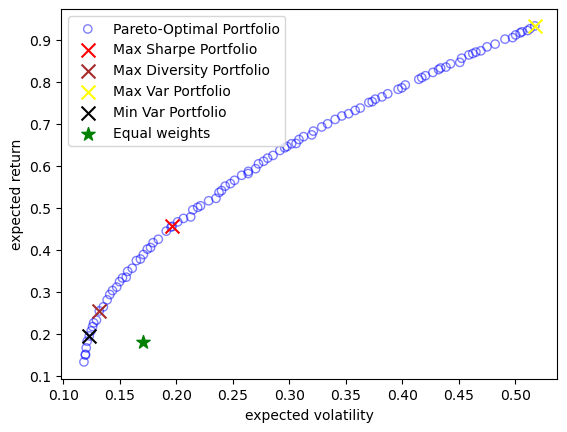

HV 0.050319708897904394
you are doing sharpe
trade data is 2025-04-01 00:00:00
Prices: [222.89770508 204.38121033 131.08279419 312.03268433 383.20001221
 102.77999878 192.16999817 168.52000427  41.49000168 532.98999023
 328.98596191 953.15814209 269.77612305  61.3901329  166.48219299
  97.68000031 203.78999329 158.88000488 157.07000732 548.45001221
 365.51998901 248.68511963 612.7098999  496.35998535 153.25
 242.16836548  71.87000275 467.08999634 803.58282471 547.64141846
 313.63000488 586.          87.12000275 381.48965454 928.38000488
 811.55999756 110.15000153 141.4319458  149.66999817 169.50343323
 158.08999634 153.05000305 482.97000122 268.45999146 176.48434448
 523.11999512 345.77575684  70.9209137   88.61574554 117.95362854]
Stock allocation: [   0.          672.50950028    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.           14.36964228    0.            0.   

C:\Users\kaoyoung\AppData\Local\Temp\ipykernel_22668\3164555611.py:5: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


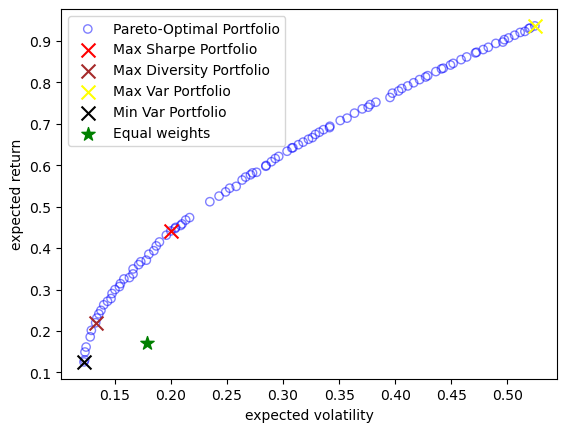

HV 0.05115530306283799
you are doing sharpe
trade data is 2025-04-15 00:00:00
Prices: [201.87527466 176.80000305 126.22000122 288.66000366 350.38000488
  95.29000092 179.58999634 178.94999695  37.99000168 528.16998291
 292.02392578 975.64880371 254.92999268  57.20000076 132.92097473
  85.01000214 185.66999817 158.67999268 156.30999756 507.89001465
 354.10998535 239.10884094 594.08001709 488.26998901 153.61999512
 233.13000488  71.86000061 450.97000122 755.63110352 517.38000488
 312.48001099 521.52001953  78.38999939 385.02316284 976.2800293
 816.5        112.19999695 133.94000244 142.83999634 167.42637634
 160.08999634 138.6000061  441.         254.11000061 149.90112305
 583.59002686 335.25320435  64.18785095  93.74334717 102.15909576]
Stock allocation: [   0.          288.20314718    0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0

In [58]:
'''
%%time
for config in configurations:
    print(f"\nRunning configuration: {config['name']}")
'''

results = {}
sharpe_portfolio_history = []
calmar_portfolio_history = []
diversity_portfolio_history = []
max_var_portfolio_history = []
min_var_portfolio_history = []
data_size = len(data)

sharpe_current_budget = 1_000_000
sharpe_stock_alloc = np.zeros(len(ticker))  
calmar_current_budget = 1_000_000
calmar_stock_alloc = np.zeros(len(ticker))  
diversity_current_budget = 1_000_000
diversity_stock_alloc = np.zeros(len(ticker))  
max_var_current_budget = 1_000_000
max_var_stock_alloc = np.zeros(len(ticker))  
min_var_current_budget = 1_000_000
min_var_stock_alloc = np.zeros(len(ticker))  

sharpe_budget_history = []
sharpe_stock_alloc_history = []
calmar_budget_history = []
calmar_stock_alloc_history = []
diversity_budget_history = []
diversity_stock_alloc_history = []
max_var_budget_history = []
max_var_stock_alloc_history = []
min_var_budget_history = []
min_var_stock_alloc_history = []

test_period = 250

VaR_confidence = 0.95
hhi_limit = 0.25
# 這裡的 hhi_limit 會影響到多元化的程度，hhi_limit 越小，越分散

for day in range(test_period):
    if(day%10 != 0): 
        continue
    print(f"Current day is: {day}")
    serach_day = data_size - (test_period-day)
    current_data = data.iloc[:serach_day] 

    # print(current_data)
    mu = calculate_expected_returns(current_data)
    cov = calculate_covariance_matrix(current_data)
    returns_df = calculate_returns_df_matrix(current_data)
    problem = PortfolioProblem(mu, cov, returns_df, risk_free_rate=0.02, VaR_confidence = VaR_confidence, hhi_limit=hhi_limit)
    # print(current_data)
    
    '''
    algorithm = NSGA2(repair=PortfolioRepair(),
                      sampling = config['sampling'],
                      crossover=config['crossover'])
    '''
    
    algorithm = NSGA2(repair=PortfolioRepair())
    
    
    res = minimize(problem,
                   algorithm,
                   seed=1,
                   verbose=False)
    

    # adding the result
    # results[config['name']] = res


   
    # Get optimal portfolio weights
    X, F, sharpe, calmar, diversity, var = res.opt.get("X", "F", "sharpe", "calmar", "diversity", "var")
    F = F * [1, -1]  # Adjust for minimization/maximization
    
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    # Select portfolio with maximum Sharpe ratio
    max_sharpe_idx = sharpe.argmax()
    # max_calmar_idx = calmar.argmax()
    max_diversity_idx = diversity.argmax()
    max_var_idx = var.argmax()
    min_var_idx = var.argmin()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    # plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe_idx, 0], F[max_sharpe_idx, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    # plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(F[max_diversity_idx, 0], F[max_diversity_idx, 1], marker="x", s=100, color="brown", label="Max Diversity Portfolio")
    plt.scatter(F[max_var_idx, 0], F[max_var_idx, 1], marker="x", s=100, color="yellow", label="Max Var Portfolio")
    plt.scatter(F[min_var_idx, 0], F[min_var_idx, 1], marker="x", s=100, color="black", label="Min Var Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    
    sharpe_optimal_weights = X[max_sharpe_idx]
    # calmar_optimal_weights = X[max_calmar_idx]
    diversity_optimal_weights = X[max_diversity_idx]
    max_var_optimal_weights = X[max_var_idx]
    min_var_optimal_weights = X[min_var_idx]

    # calculate HV
    HVindex = calculate_HV(F)

    '''
    # Add other indicators (f1, ..., fk) for daily allocation
    additional_indicators = calculate_technical_indicators(current_data)  # Assume this function exists
    final_weights = adjust_weights_with_indicators(optimal_weights, additional_indicators)
    '''


    
    # Make investment with adjusted weights
    print("you are doing sharpe")
    sharpe_daily_return = execute_trades(sharpe_stock_alloc, sharpe_optimal_weights, sharpe_current_budget, serach_day, sharpe_budget_history, sharpe_stock_alloc_history)  # Assume this function exists
    sharpe_portfolio_history.append(sharpe_daily_return)

    # print("you are doing calmar")
    # calmar_daily_return = calmar_execute_trades(calmar_stock_alloc, calmar_optimal_weights, calmar_current_budget, serach_day, calmar_budget_history, calmar_stock_alloc_history)  # Assume this function exists
    # calmar_portfolio_history.append(calmar_daily_return)

    print("you are doing diversity")
    diversity_daily_return = execute_trades(diversity_stock_alloc, diversity_optimal_weights, diversity_current_budget, serach_day, diversity_budget_history, diversity_stock_alloc_history)  # Assume this function exists
    diversity_portfolio_history.append(diversity_daily_return)

    print("you are doing max_var")
    max_var_daily_return = execute_trades(max_var_stock_alloc, max_var_optimal_weights, max_var_current_budget, serach_day, max_var_budget_history, max_var_stock_alloc_history)  # Assume this function exists
    max_var_portfolio_history.append(max_var_daily_return)

    print("you are doing min_var")
    min_var_daily_return = execute_trades(min_var_stock_alloc, min_var_optimal_weights, min_var_current_budget, serach_day, min_var_budget_history, min_var_stock_alloc_history)  # Assume this function exists
    min_var_portfolio_history.append(min_var_daily_return)
    

#### for i in range(len(stock_alloc_history)):
    print(stock_alloc_history[i]) 

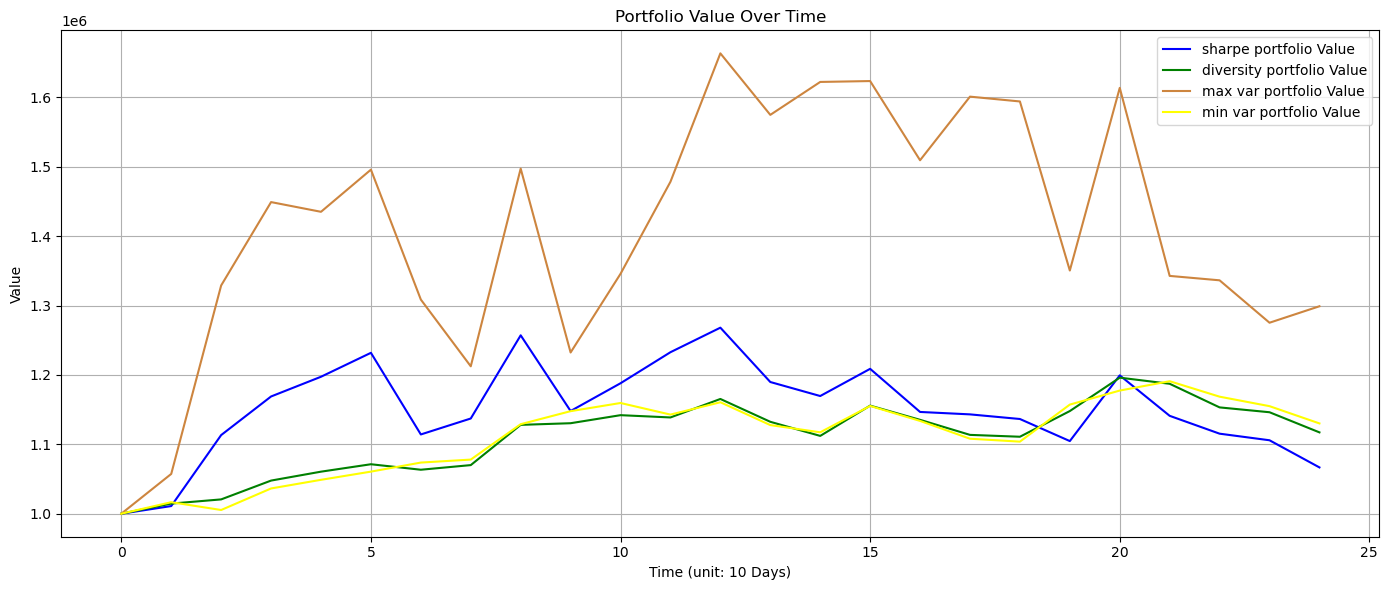

In [60]:
# Plotting
plt.figure(figsize=(14, 6))
plt.plot(sharpe_budget_history, label="sharpe portfolio Value", color='blue')
#plt.plot(calmar_budget_history, label="calmar Portfolio Value", color='red')
plt.plot(diversity_budget_history, label="diversity portfolio Value", color='green')
plt.plot(max_var_budget_history, label="max var portfolio Value", color='peru')
plt.plot(min_var_budget_history, label="min var portfolio Value", color='yellow')
plt.title("Portfolio Value Over Time")
plt.xlabel("Time (unit: 10 Days)")
plt.ylabel("Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Compare results
for name, res in results.items():
    print(f"\nThe result of {name} is as follows\n")
    X, F, sharpe = res.opt.get("X", "F", "sharpe")
    F = F * [1, -1]
    max_sharpe = sharpe.argmax()

    '''
    # equal weights
    x = np.zeros((len(ticker), 1))
    x = x + 1.0/len(x)

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()

    plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
    plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
    plt.legend()
    plt.xlabel("expected volatility")
    plt.ylabel("expected return")
    plt.show()
    '''
    x = X[max_sharpe].T

    print("Best Sharpe: \nReturn     = ", x.T @ mu)
    print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))
    print("sharpo ratio = ", (x.T @ mu - 0.02)/(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0)))


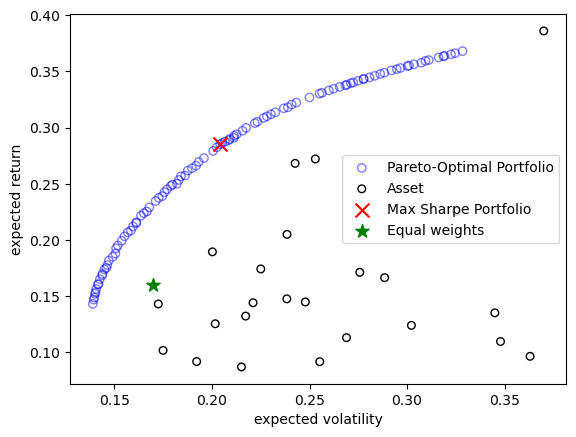

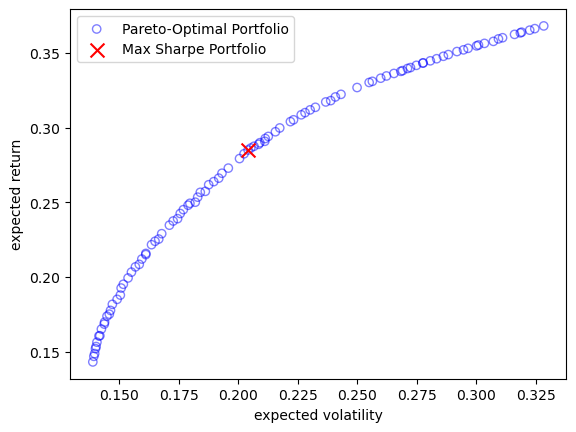

In [52]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()

In [54]:
allocation = {name: w for name, w in zip(data.columns, X[max_sharpe])}
allocation = sorted(allocation.items(), key=operator.itemgetter(1), reverse=True)

print("Allocation With Best Sharpe")
for name, w in allocation:
    print(f"{name:<5} {w}")

Allocation With Best Sharpe
TMO   0.32297696275160204
META  0.27453075912247143
MSFT  0.1774543857862301
NI    0.10187217354534035
CMCSA 0.06870700223721722
LUV   0.05445871655713892
BAX   0.0
BMY   0.0
CNP   0.0
CPB   0.0
DE    0.0
HPQ   0.0
JCI   0.0
JPM   0.0
MMC   0.0
MO    0.0
PCAR  0.0
PSA   0.0
SEE   0.0
SPY   0.0
T     0.0
TXT   0.0
VZ    0.0
ZION  0.0


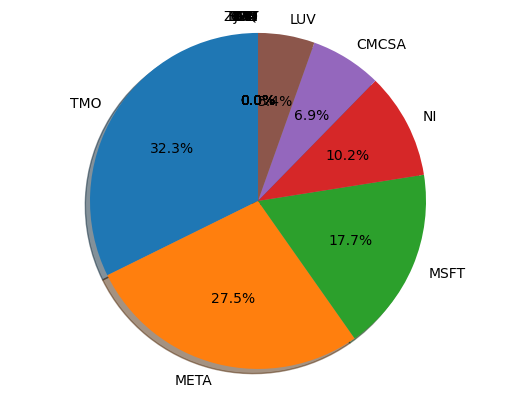

In [56]:
for al in allocation:
    if al[1] <= 1e-2:
        allocation.remove(al)

col_name = []
w1 = []
for name, w in allocation:
    col_name.append(name)
    w1.append(w)
    
fig1, ax1 = plt.subplots()
ax1.pie(w1, labels=col_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [191]:
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

print("For equal weights: \nReturn     = ", (x.T @ mu)[0])
print("Volatility = ", (np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))[0][0])

For equal weights: 
Return     =  0.0933490427723025
Volatility =  0.16460265032746366


In [193]:
x = X[max_sharpe].T

print("Best Sharpe: \nReturn     = ", x.T @ mu)
print("Volatility = ", np.sqrt(x.T @ cov @ x) * np.sqrt(250.0))

Best Sharpe: 
Return     =  0.019924009576235042
Volatility =  0.48197988245737083


# Solve problem with MOEA/D

In [64]:
import numpy as np
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.core.problem import ElementwiseProblem
from pymoo.core.repair import Repair

class PortfolioProblem(ElementwiseProblem):
    def __init__(self, mu, cov, risk_free_rate=0.02, **kwargs):
        super().__init__(
            n_var=len(mu),
            n_obj=2,
            xl=0.0,
            xu=1.0,
            **kwargs
        )
        self.mu = mu
        self.cov = cov
        self.risk_free_rate = risk_free_rate

    def _evaluate(self, x, out, *args, **kwargs):
        exp_return = x @ self.mu
        exp_risk   = np.sqrt(x.T @ self.cov @ x) * np.sqrt(250.0)
        sharpe     = (exp_return - self.risk_free_rate) / exp_risk
        out["F"]   = [exp_risk, -exp_return]
        out["sharpe"] = sharpe

class PortfolioRepair(Repair):
    def _do(self, problem, X, **kwargs):
        X[X < 1e-3] = 0
        return X / X.sum(axis=1, keepdims=True)

# Compute mu, cov from your data
mu  = calculate_expected_returns(current_data)
cov = calculate_covariance_matrix(current_data)

# Problem definition
problem = PortfolioProblem(mu, cov)

# Reference directions for MOEA/D 
ref_dirs = get_reference_directions("uniform", 2, n_partitions=100)

# MOEA/D algorithm setup
algorithm = MOEAD(
    ref_dirs,
    n_neighbors=20,
    prob_neighbor_mating=0.7,
    repair=PortfolioRepair()
)

# Run optimization
res = minimize(problem, algorithm, seed=1, verbose=False)

# Extract and select optimal portfolio
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe_idx = sharpe.argmax()
optimal_weights = X[max_sharpe_idx]

# Hypervolume (optional)
HVindex = calculate_HV(F)


C:\Users\kaomi\AppData\Local\Temp\ipykernel_18768\4236682315.py:4: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ind_er = current_data.resample('Y').last().pct_change().mean()


HV 0.022752022831910097


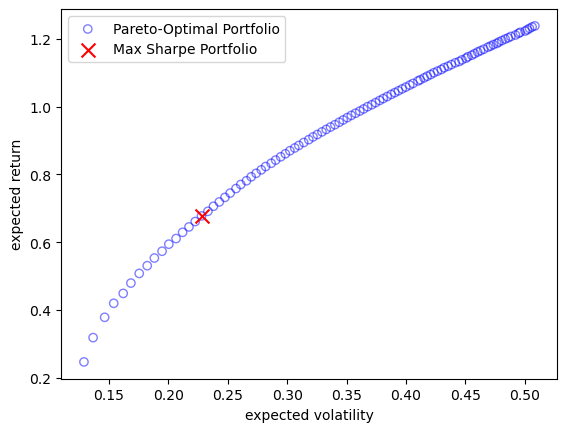

In [65]:
X, F, sharpe = res.opt.get("X", "F", "sharpe")
F = F * [1, -1]
max_sharpe = sharpe.argmax()

# equal weights
x = np.zeros((len(ticker), 1))
x = x + 1.0/len(x)

'''
plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(cov.diagonal() ** 0.5 * np.sqrt(250.0), mu, facecolor="none", edgecolors="black", s=30, label="Asset")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.scatter(np.sqrt(x.T @ cov @ x) * np.sqrt(250.0), x.T @ mu, marker="*", s=100, color="green", label="Equal weights")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()
'''

plt.scatter(F[:, 0], F[:, 1], facecolor="none", edgecolors="blue", alpha=0.5, label="Pareto-Optimal Portfolio")
plt.scatter(F[max_sharpe, 0], F[max_sharpe, 1], marker="x", s=100, color="red", label="Max Sharpe Portfolio")
plt.legend()
plt.xlabel("expected volatility")
plt.ylabel("expected return")
plt.show()